# Part 2: Modelling

## Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## load in cleaned data from EDA

In [2]:
hdb_train = pd.read_csv('./hdb_data_clean.csv')

In [3]:
hdb_train.head()

,Unnamed: 0,resale_price,town,flat_type,ZONE,mid_storey,floor_area_sqft,hdb_age,total_dwelling_units,mrt_nearest_distance
0,0,680000.0,KALLANG/WHAMPOA,4 ROOM,RCR,11,968.760,15,142,330.083069
1,1,665000.0,BISHAN,5 ROOM,RCR,8,1399.320,34,112,903.659703
2,2,838000.0,BUKIT BATOK,EXECUTIVE,OCR,14,1550.016,24,90,1334.251197
3,3,550000.0,BISHAN,4 ROOM,RCR,3,1108.692,29,75,907.453484
4,4,298000.0,YISHUN,4 ROOM,OCR,2,893.412,34,48,412.343032


## prepare data and do one-hot encoding for flat_type and zone

In [4]:
hdb_train = hdb_train.drop(columns="Unnamed: 0")


In [5]:
hdb_train = hdb_train.rename(columns={'ZONE':'zone'})

In [6]:
zone_dummies = pd.get_dummies(hdb_train.zone, prefix = 'zone')

In [7]:
zone_dummies.drop(zone_dummies.columns[0],axis = 1, inplace=True)

In [8]:
flat_type_dummies = pd.get_dummies(hdb_train.flat_type, prefix = 'flat_type')
flat_type_dummies.drop(flat_type_dummies.columns[0],axis = 1, inplace=True)
flat_type_dummies.head()

,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
0,False,False,True,False,False,False
1,False,False,False,True,False,False
2,False,False,False,False,True,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [9]:
hdb_train = pd.concat([hdb_train, zone_dummies, flat_type_dummies], axis = 1)

hdb_train.head()

,resale_price,town,flat_type,zone,mid_storey,floor_area_sqft,hdb_age,total_dwelling_units,mrt_nearest_distance,zone_OCR,zone_RCR,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
0,680000.0,KALLANG/WHAMPOA,4 ROOM,RCR,11,968.760,15,142,330.083069,False,True,False,False,True,False,False,False
1,665000.0,BISHAN,5 ROOM,RCR,8,1399.320,34,112,903.659703,False,True,False,False,False,True,False,False
2,838000.0,BUKIT BATOK,EXECUTIVE,OCR,14,1550.016,24,90,1334.251197,True,False,False,False,False,False,True,False
3,550000.0,BISHAN,4 ROOM,RCR,3,1108.692,29,75,907.453484,False,True,False,False,True,False,False,False
4,298000.0,YISHUN,4 ROOM,OCR,2,893.412,34,48,412.343032,True,False,False,False,True,False,False,False


In [10]:
hdb_train.isna().sum()

resale_price                  0
town                          0
flat_type                     0
zone                          0
mid_storey                    0
floor_area_sqft               0
hdb_age                       0
total_dwelling_units          0
mrt_nearest_distance          0
zone_OCR                      0
zone_RCR                      0
flat_type_2 ROOM              0
flat_type_3 ROOM              0
flat_type_4 ROOM              0
flat_type_5 ROOM              0
flat_type_EXECUTIVE           0
flat_type_MULTI-GENERATION    0
dtype: int64

## Define features & target for modelling

In [11]:
cols = ["town", "flat_type","zone", "resale_price"]

feature_cols = hdb_train.columns.to_list()

for col in cols:
    feature_cols.remove(col)

X = hdb_train[feature_cols]
y= hdb_train['resale_price']

split data into train and test data at 80-20 split ratio

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=22)

## Linear Regression

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
#test for null rmse as baseline comparison
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_train.mean())
null_rmse = metrics.root_mean_squared_error(y_test, y_null)
null_rmse

142966.71749617776

## Check model RMSE, R^2 and coefficients

In [17]:
y_pred = lr.predict(X_test)
model_rmse = metrics.root_mean_squared_error(y_test, y_pred)
model_rmse

75420.74547956785

In [18]:
r2 = r2_score(y_test, y_pred)
r2

0.7216980578065426

In [19]:
print(f'Intercept: {lr.intercept_}')
print(f'Coefficient: {lr.coef_}')

Intercept: 277922.94093573943
Coefficient: [ 5.44219855e+03  3.31216898e+02 -2.70644183e+03  1.00532075e+02
 -4.30129290e+01 -2.04777482e+05 -6.68618344e+04  3.93562995e+03
  4.61827889e+04  5.13465330e+04  6.01464761e+04  9.76501675e+04
  1.82004477e+05]


## Seems to not have good performance, so to try with town instead of zone

In [21]:
hdb_train_2 = pd.read_csv('./hdb_data_clean.csv')


In [22]:
hdb_train_2 = hdb_train_2.drop(columns="Unnamed: 0")

In [23]:
hdb_train_2.head()

,resale_price,town,flat_type,ZONE,mid_storey,floor_area_sqft,hdb_age,total_dwelling_units,mrt_nearest_distance
0,680000.0,KALLANG/WHAMPOA,4 ROOM,RCR,11,968.760,15,142,330.083069
1,665000.0,BISHAN,5 ROOM,RCR,8,1399.320,34,112,903.659703
2,838000.0,BUKIT BATOK,EXECUTIVE,OCR,14,1550.016,24,90,1334.251197
3,550000.0,BISHAN,4 ROOM,RCR,3,1108.692,29,75,907.453484
4,298000.0,YISHUN,4 ROOM,OCR,2,893.412,34,48,412.343032


In [24]:
town_dummies = pd.get_dummies(hdb_train_2.town, prefix = "town")
town_dummies.drop(town_dummies.columns[0],axis = 1,inplace = True)

In [25]:
hdb_train_2 = pd.concat([hdb_train_2,town_dummies], axis = 1)

In [26]:
hdb_train_2.head()

,resale_price,town,flat_type,ZONE,mid_storey,floor_area_sqft,hdb_age,total_dwelling_units,mrt_nearest_distance,town_BEDOK,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,680000.0,KALLANG/WHAMPOA,4 ROOM,RCR,11,968.760,15,142,330.083069,False,...,False,False,False,False,False,False,False,False,False,False
1,665000.0,BISHAN,5 ROOM,RCR,8,1399.320,34,112,903.659703,False,...,False,False,False,False,False,False,False,False,False,False
2,838000.0,BUKIT BATOK,EXECUTIVE,OCR,14,1550.016,24,90,1334.251197,False,...,False,False,False,False,False,False,False,False,False,False
3,550000.0,BISHAN,4 ROOM,RCR,3,1108.692,29,75,907.453484,False,...,False,False,False,False,False,False,False,False,False,False
4,298000.0,YISHUN,4 ROOM,OCR,2,893.412,34,48,412.343032,False,...,False,False,False,False,False,False,False,False,False,True


In [27]:
hdb_train_2 = pd.concat([hdb_train_2, flat_type_dummies], axis = 1)

In [28]:
hdb_train_2.head()

,resale_price,town,flat_type,ZONE,mid_storey,floor_area_sqft,hdb_age,total_dwelling_units,mrt_nearest_distance,town_BEDOK,...,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
0,680000.0,KALLANG/WHAMPOA,4 ROOM,RCR,11,968.760,15,142,330.083069,False,...,False,False,False,False,False,False,True,False,False,False
1,665000.0,BISHAN,5 ROOM,RCR,8,1399.320,34,112,903.659703,False,...,False,False,False,False,False,False,False,True,False,False
2,838000.0,BUKIT BATOK,EXECUTIVE,OCR,14,1550.016,24,90,1334.251197,False,...,False,False,False,False,False,False,False,False,True,False
3,550000.0,BISHAN,4 ROOM,RCR,3,1108.692,29,75,907.453484,False,...,False,False,False,False,False,False,True,False,False,False
4,298000.0,YISHUN,4 ROOM,OCR,2,893.412,34,48,412.343032,False,...,False,False,False,True,False,False,True,False,False,False


In [29]:
cols = ["town", "flat_type","ZONE", "resale_price"]

feature_cols = hdb_train_2.columns.to_list()

for col in cols:
    feature_cols.remove(col)

X = hdb_train_2[feature_cols]
y= hdb_train_2['resale_price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [31]:
X_train

,mid_storey,floor_area_sqft,hdb_age,total_dwelling_units,mrt_nearest_distance,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
24881,14,1076.400,24,112,346.476693,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
70140,11,882.648,45,104,1888.138744,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
108299,8,979.524,37,88,507.670038,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
87566,2,1313.208,23,88,588.515735,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
118804,2,990.288,43,108,593.932820,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81492,8,1302.444,23,135,2129.164005,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20971,5,979.524,36,168,722.209692,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
120166,5,1130.220,22,68,447.047862,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
24932,26,1184.040,15,173,292.767845,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_train.mean())
null_rmse = metrics.root_mean_squared_error(y_test, y_null)
null_rmse

142966.71749617776

In [35]:
y_pred = lr.predict(X_test)

In [36]:
model_rmse = metrics.root_mean_squared_error(y_test, y_pred)
model_rmse

57111.28187958344

In [37]:
r2 = r2_score(y_test, y_pred)
r2

0.8404200179465784

In [38]:
print(f'Intercept: {lr.intercept_}')
print(f'Coefficient: {lr.coef_}')

Intercept: 254789.46902667335
Coefficient: [ 4.61369894e+03  3.22220683e+02 -4.45783974e+03  2.45022734e+01
 -5.73211481e+01 -2.78784964e+04  8.37730068e+04 -8.98819252e+04
  8.19814606e+04 -1.30339284e+05  1.52807517e+05  1.12478770e+05
 -1.76157773e+05  3.41426584e+04  7.18978491e+03 -7.14118260e+04
 -5.94992821e+04 -1.28179906e+05  3.34677876e+04  1.99325362e+05
 -9.34857941e+04 -1.23011250e+05  8.38801468e+04 -2.01796186e+05
 -1.27238308e+05  7.70251363e+03 -5.90469307e+04  3.10491895e+04
 -1.69256038e+05 -1.03004976e+05 -1.04033191e+03  3.53202015e+04
  4.97082485e+04  6.60055853e+04  1.07880111e+05  1.80305911e+05]


## Much better RMSE and R^2. to further test with other models. First with Ridge Regression

In [39]:
#try ridge regression
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)

Best alpha: 0.01


In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

rmse =metrics.root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)
print("Coefficients:", ridge.coef_)

RMSE: 57111.292065780566
Coefficients: [ 4.61372427e+03  3.22227817e+02 -4.45783267e+03  2.45023420e+01
 -5.73213286e+01 -2.78770014e+04  8.37741365e+04 -8.98803405e+04
  8.19818482e+04 -1.30337304e+05  1.52803380e+05  1.12479152e+05
 -1.76156073e+05  3.41439309e+04  7.19138527e+03 -7.14101843e+04
 -5.94977130e+04 -1.28178137e+05  3.34691578e+04  1.99324443e+05
 -9.34842962e+04 -1.23008973e+05  8.38814248e+04 -2.01793462e+05
 -1.27236101e+05  7.70409385e+03 -5.90455534e+04  3.10505536e+04
 -1.69254409e+05 -1.03003116e+05 -1.10589887e+03  3.52529616e+04
  4.96386484e+04  6.59341964e+04  1.07806635e+05  1.80188289e+05]


In [41]:
r2_score(y_test,y_pred)

0.8404199610221583

## Looks the same, so to try Random Forest Regressor instead

In [42]:
#test randomforest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 22)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse =metrics.root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)

RMSE: 39374.9927026224


In [43]:
r2 = r2_score(y_test, y_pred)
r2

0.9241465098482524

## Much better RMSE and R^2. to use this as chosen model

## Feature Importance Analysis

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns 

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

def group_feature(col):
    if col.startswith("flat_type"):
        return "flat_type"
    elif col.startswith("town"):
        return "town"
    else:
        return col
## aggregated the one-hot encoded features back to original feature to have better view on how important the feature is
feat_imp['grouped_feature'] = feat_imp['feature'].apply(group_feature)

grouped = feat_imp.groupby('grouped_feature')['importance'].sum().sort_values(ascending=False)

print(grouped)

grouped_feature
floor_area_sqft         0.420042
town                    0.193578
mid_storey              0.100003
mrt_nearest_distance    0.085242
hdb_age                 0.083715
flat_type               0.080919
total_dwelling_units    0.036502
Name: importance, dtype: float64


In [46]:
grouped.reset_index()

,grouped_feature,importance
0,floor_area_sqft,0.420042
1,town,0.193578
2,mid_storey,0.100003
3,mrt_nearest_distance,0.085242
4,hdb_age,0.083715
5,flat_type,0.080919
6,total_dwelling_units,0.036502


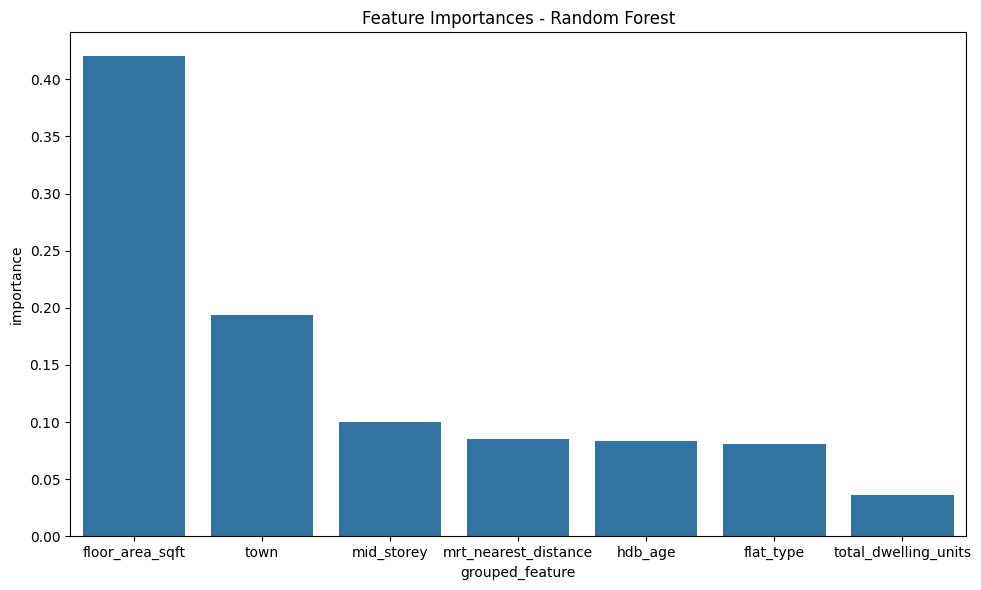

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(y='importance', x='grouped_feature', data=grouped.reset_index())
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

### Save model as pkl file, to be used for Price Predictor app.

In [48]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']